In [1]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [2]:
#IMPORTING LIBRARIES
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np
import yfinance as yf

E:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Selecting the ticker of GOLDMAN SACHS

In [3]:
ticker = 'GS'

In [4]:
#DOWNLOADING TICKER DATA
gs = yf.download(ticker,start = "2010-01-01", end = "2022-11-06")

[*********************100%***********************]  1 of 1 completed


Displaying the Data

In [5]:
gs

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,167.289993,170.130005,166.929993,168.839996,138.314636,6401800
2010-01-04,170.050003,174.250000,169.509995,173.080002,141.788101,9135000
2010-01-05,173.000000,176.259995,172.570007,176.139999,144.294907,11659400
2010-01-06,175.380005,175.380005,173.759995,174.259995,142.754745,7381100
2010-01-07,174.320007,178.750000,173.949997,177.669998,145.548233,8727400
...,...,...,...,...,...,...
2022-10-31,341.070007,346.179993,340.570007,344.510010,344.510010,2224000
2022-11-01,345.130005,348.690002,343.769989,348.579987,348.579987,2316600
2022-11-02,347.619995,357.440002,346.739990,349.790009,349.790009,3221200


In [6]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

Initializing various Technical Indicators of Stock market

In [7]:
period = 30
#simple moving average
gs['SMA'] = gs['Close'].rolling(window = period).mean()
#standard deviation
gs['STD'] = gs['Close'].rolling(window = period).std()
#upper bollinger band
gs['Upper'] = gs['SMA'] + (gs['STD'] * 2)
#lower bollinger band
gs['Lower'] = gs['SMA'] - (gs['STD'] * 2)

In [8]:
gs

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2009-12-31,167.289993,170.130005,166.929993,168.839996,138.314636,6401800,NaN,NaN,NaN,NaN
2010-01-04,170.050003,174.250000,169.509995,173.080002,141.788101,9135000,NaN,NaN,NaN,NaN
2010-01-05,173.000000,176.259995,172.570007,176.139999,144.294907,11659400,NaN,NaN,NaN,NaN
2010-01-06,175.380005,175.380005,173.759995,174.259995,142.754745,7381100,NaN,NaN,NaN,NaN
2010-01-07,174.320007,178.750000,173.949997,177.669998,145.548233,8727400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,341.070007,346.179993,340.570007,344.510010,344.510010,2224000,311.641000,15.598315,342.837630,280.444370
2022-11-01,345.130005,348.690002,343.769989,348.579987,348.579987,2316600,312.485000,16.880955,346.246910,278.723089
2022-11-02,347.619995,357.440002,346.739990,349.790009,349.790009,3221200,313.454333,18.156273,349.766880,277.141787


DROPPING NULL VALUES

In [9]:
gs2 = gs.dropna()

In [10]:
gs2

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2010-02-12,152.369995,154.500000,151.139999,153.929993,126.100296,10293200,161.094667,9.286046,179.666759,142.522574
2010-02-16,155.300003,157.740005,154.600006,157.399994,128.942947,11497100,160.713333,9.191426,179.096185,142.330481
2010-02-17,158.000000,158.190002,155.809998,157.259995,128.828232,10070000,160.186000,8.906866,177.999732,142.372267
2010-02-18,155.610001,156.589996,154.880005,155.729996,127.574913,10991100,159.505666,8.411970,176.329606,142.681726
2010-02-19,154.509995,157.000000,154.490005,156.179993,127.943558,8693000,158.902999,7.953636,174.810272,142.995726
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,341.070007,346.179993,340.570007,344.510010,344.510010,2224000,311.641000,15.598315,342.837630,280.444370
2022-11-01,345.130005,348.690002,343.769989,348.579987,348.579987,2316600,312.485000,16.880955,346.246910,278.723089
2022-11-02,347.619995,357.440002,346.739990,349.790009,349.790009,3221200,313.454333,18.156273,349.766880,277.141787


Plotting the Technical Indicators

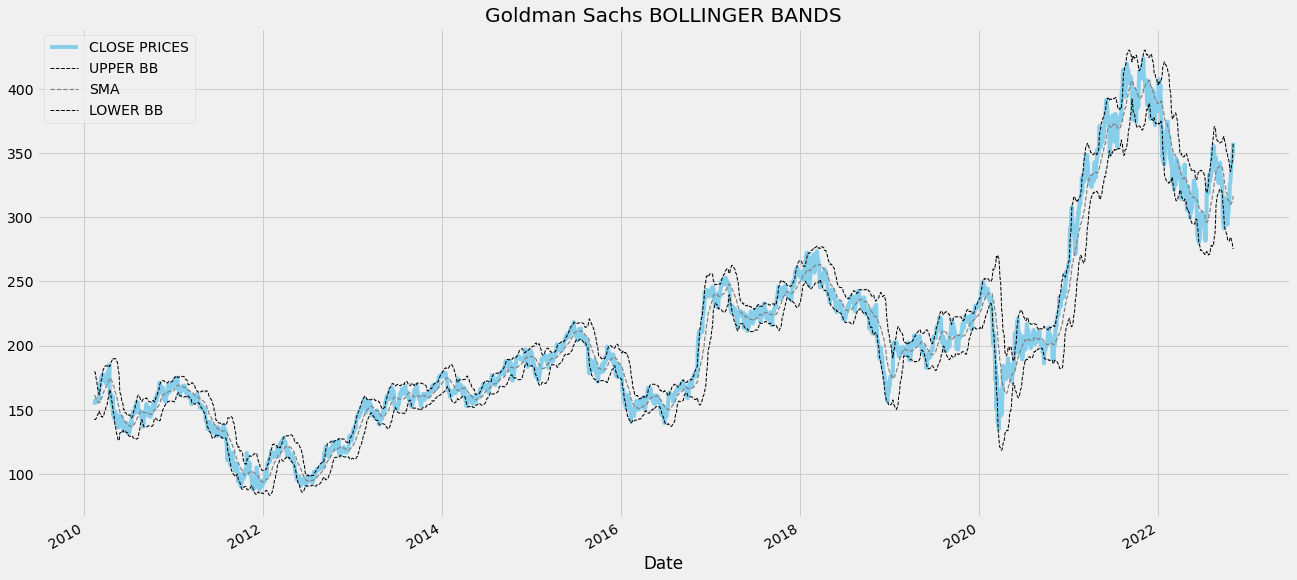

In [11]:
#PLOTTING THE GRAPHS
gs2['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
gs2['Upper'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
gs2['SMA'].plot(label = 'SMA', linestyle = '--', linewidth = 1.2, color = 'grey')
gs2['Lower'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('Goldman Sachs BOLLINGER BANDS')
plt.show()

BUYING AND SELLING STRATEGIES

In [12]:
def implement_bb_strategy(data, Lower, Upper):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > Lower[i-1] and data[i] < Lower[i]: # BUY THE STOCK
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < Upper[i-1] and data[i] > Upper[i]:
            if signal != -1:
                buy_price.append(np.nan)      # SELL THE STOCK
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(gs2['Close'], gs2['Lower'], gs2['Upper'])

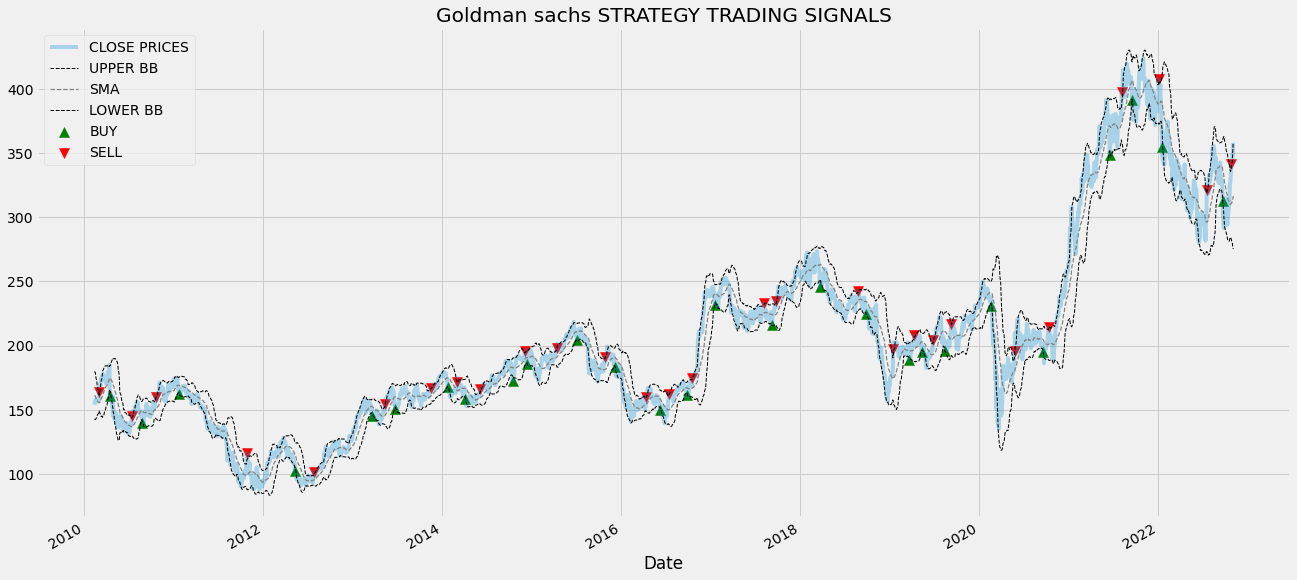

In [13]:
gs2['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
gs2['Upper'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
gs2['SMA'].plot(label = 'SMA', linestyle = '--', linewidth = 1.2, color = 'grey')
gs2['Lower'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(gs2.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 100)
plt.scatter(gs2.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 100)
plt.title('Goldman sachs STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [14]:
print(gs2.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA', 'STD',
       'Upper', 'Lower'],
      dtype='object')


In [15]:
gs2.reset_index(inplace = True)

In [16]:
print(gs2.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA',
       'STD', 'Upper', 'Lower'],
      dtype='object')


In [17]:
#CREATING THE STOCK HOLDING COLUMNS
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(gs2['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
upper_bb = gs2['Upper']
lower_bb = gs2['Lower']
close_price = gs2['Close']
#date = gs2['Date']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(gs2.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(gs2.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
tradestrategy = pd.concat(frames, join = 'inner', axis = 1)
tradestrategy = tradestrategy.reset_index()

In [18]:
tradestrategy

,index,Close,Upper,Lower,bb_signal,bb_position
0,0,153.929993,179.666759,142.522574,0,1
1,1,157.399994,179.096185,142.330481,0,1
2,2,157.259995,177.999732,142.372267,0,1
3,3,155.729996,176.329606,142.681726,0,1
4,4,156.179993,174.810272,142.995726,0,1
...,...,...,...,...,...,...
3201,3201,344.510010,342.837630,280.444370,0,0
3202,3202,348.579987,346.246910,278.723089,0,0
3203,3203,349.790009,349.766880,277.141787,0,0
3204,3204,348.869995,353.196437,276.108896,0,0


In [19]:
#Computing the profits
gs2_return = pd.DataFrame(np.diff(gs2['Close'])).rename(columns = {0:'returns'})
bb_tradestrategy_returns = []

for i in range(len(gs2_return)):
    returns = gs2_return['returns'][i] * tradestrategy['bb_position'][i]
    bb_tradestrategy_returns.append(returns)
    
        
    
bb_tradestrategy_returns_df = pd.DataFrame(bb_tradestrategy_returns).rename(columns = {0:'BB_returns'})

invest = 100000
num_of_stocks = math.floor(invest/gs2['Close'][i])
bb_invest_returns = []

for i in range(len(bb_tradestrategy_returns_df['BB_returns'])):
    returns = num_of_stocks * bb_tradestrategy_returns_df['BB_returns'][i]
    bb_invest_returns.append(returns)
    
bb_invest_returns_df = pd.DataFrame(bb_invest_returns).rename(columns = {0:'Investment_Returns'})
total_invest_return = round(sum(bb_invest_returns_df['Investment_Returns']), 2)
profit = math.floor((total_invest_return/invest)*100)
print(cl('Profit gained from the BB strategy by investing $100k in GS : {}'.format(total_invest_return), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit), attrs = ['bold']))

Profit gained from the BB strategy by investing $100k in GS : 33138.85
Profit percentage of the BB strategy : 33%
